## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


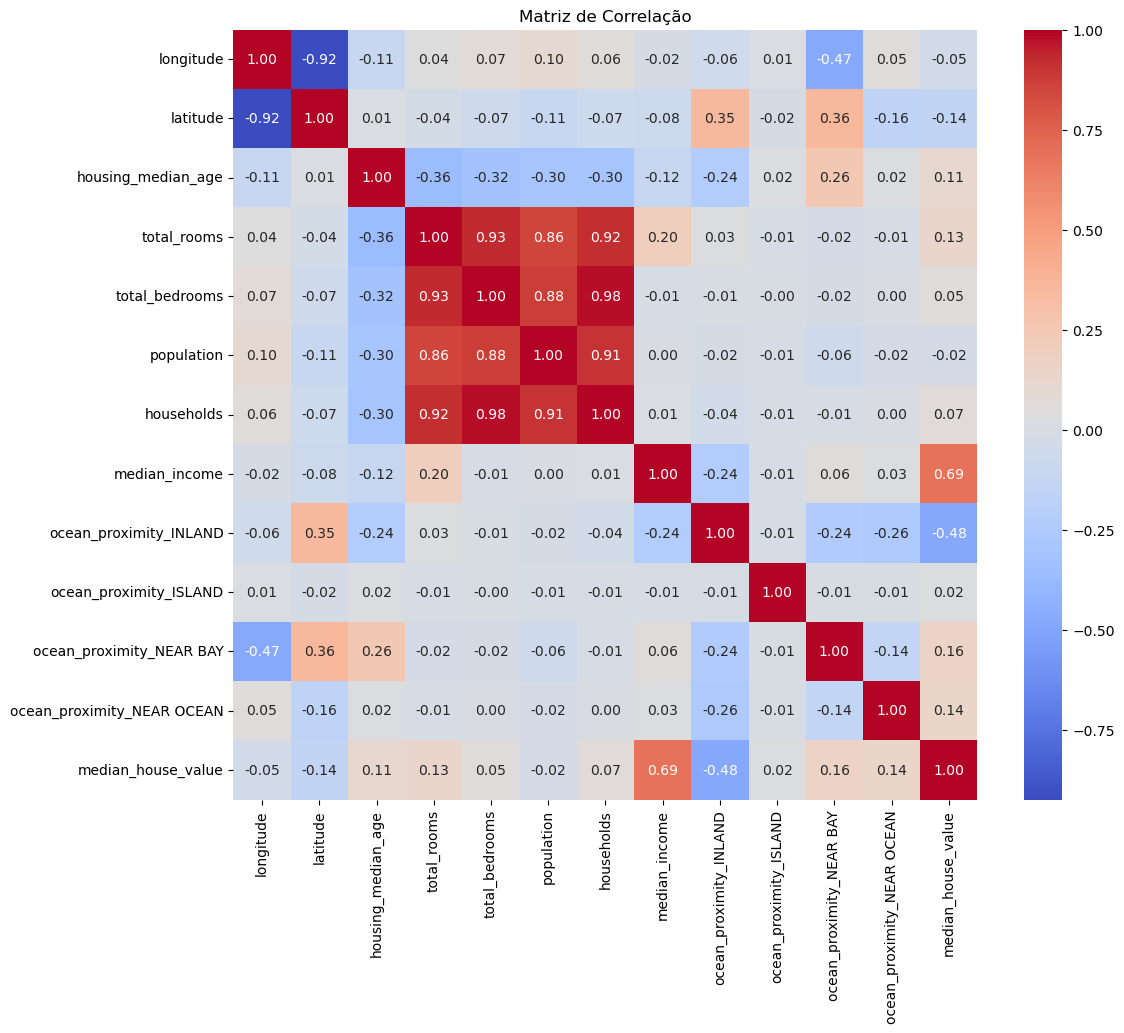

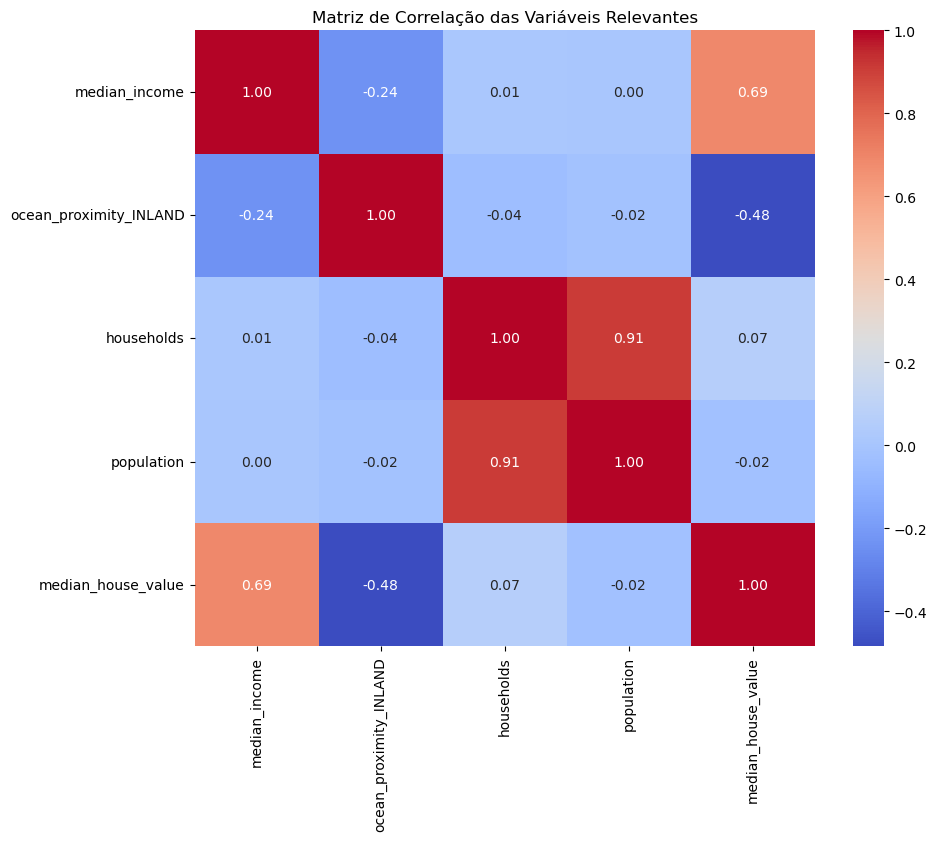

DecisionTreeRegressor(max_depth=8, random_state=42)

In [2]:
df = pd.read_csv('housing.csv')
df.head()

X = df.drop('median_house_value', axis=1) 
y = df['median_house_value']

X = pd.get_dummies(X, drop_first = True)
print(df.info())
X.head()

data_with_target = pd.concat([X, y], axis=1)

correlation_matrix = data_with_target.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

relevant_columns = ['median_income', 'ocean_proximity_INLAND', 'households', 'population', 'median_house_value']
data_with_target_relevant = data_with_target[relevant_columns]


correlation_matrix_relevant = data_with_target_relevant.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_relevant, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Relevantes")
plt.show()

X = data_with_target_relevant.drop(columns=['median_house_value'])
y = data_with_target_relevant['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)



In [3]:
X.head()

,median_income,ocean_proximity_INLAND,households,population
0,8.3252,False,126.0,322.0
1,8.3014,False,1138.0,2401.0
2,7.2574,False,177.0,496.0
3,5.6431,False,219.0,558.0
4,3.8462,False,259.0,565.0


In [4]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [5]:
ccp_alphas_decision_path = tree_max_depth_8.decision_path(X_train)

print("Caminhos indicados pelos CCP-alfas:")
print(ccp_alphas_decision_path)

Caminhos indicados pelos CCP-alfas:
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 64)	1
  (0, 96)	1
  (0, 97)	1
  (0, 98)	1
  (0, 102)	1
  (0, 103)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (1, 33)	1
  (1, 49)	1
  (1, 50)	1
  (1, 54)	1
  (1, 56)	1
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 64)	1
  (2, 65)	1
  (2, 66)	1
  (2, 74)	1
  :	:
  (14445, 2)	1
  (14445, 3)	1
  (14445, 33)	1
  (14445, 49)	1
  (14445, 57)	1
  (14445, 58)	1
  (14445, 60)	1
  (14446, 0)	1
  (14446, 236)	1
  (14446, 237)	1
  (14446, 238)	1
  (14446, 239)	1
  (14446, 255)	1
  (14446, 256)	1
  (14446, 260)	1
  (14446, 262)	1
  (14447, 0)	1
  (14447, 1)	1
  (14447, 2)	1
  (14447, 3)	1
  (14447, 33)	1
  (14447, 49)	1
  (14447, 57)	1
  (14447, 61)	1
  (14447, 62)	1


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [6]:
alphas = np.arange(0, 0.1, 0.001)

trees_list = []

for alpha in alphas:
    tree = DecisionTreeRegressor(ccp_alpha=alpha, random_state=42)
    tree.fit(X_train, y_train)
    trees_list.append(tree)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [7]:
mse_list = []

for tree in trees_list:
    y_pred_train = tree.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)

    y_pred_test = tree.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    mse_list.append((mse_train, mse_test))

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

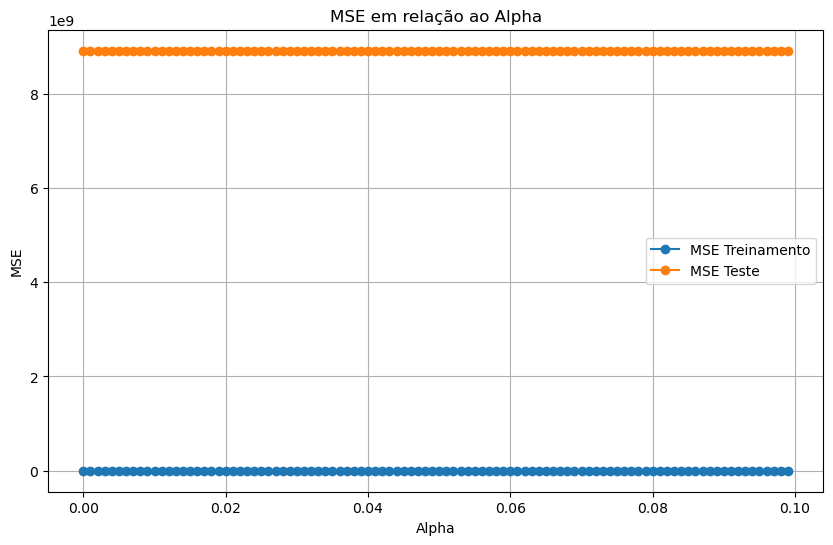

In [8]:
import matplotlib.pyplot as plt

alpha_mse_list = []

for alpha, tree in zip(alphas, trees_list):
    y_pred_train = tree.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)

    y_pred_test = tree.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    alpha_mse_list.append((alpha, mse_train, mse_test))

alphas, mse_train_values, mse_test_values = zip(*alpha_mse_list)

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train_values, label='MSE Treinamento', marker='o')
plt.plot(alphas, mse_test_values, label='MSE Teste', marker='o')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE em relação ao Alpha')
plt.legend()
plt.grid(True)
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [9]:
index_alpha = 18

tree_chosen = trees_list[index_alpha]

y_pred_test_chosen = tree_chosen.predict(X_test)

from sklearn.metrics import r2_score
r2_chosen = r2_score(y_test, y_pred_test_chosen)

print("R-quadrado da árvore escolhida (alpha = {:.3f}): {:.4f}".format(alphas[index_alpha], r2_chosen))

R-quadrado da árvore escolhida (alpha = 0.018): 0.3214


### 7. Visualize esta árvore.

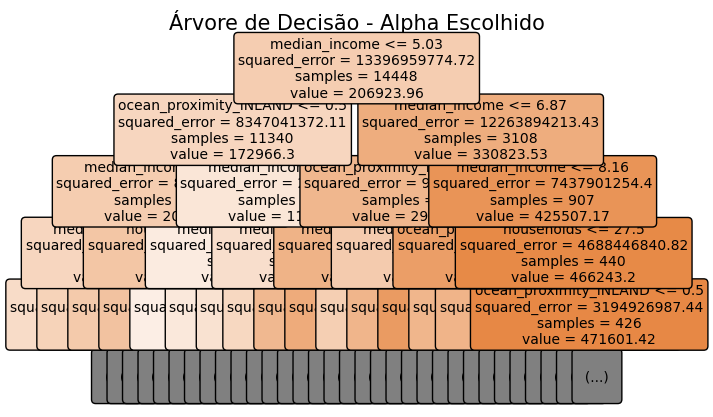

In [10]:
feature_names = X.columns.tolist()
plot_tree(tree_chosen, feature_names=feature_names, filled=True, rounded=True, fontsize=10, max_depth=4, precision=2)
plt.title("Árvore de Decisão - Alpha Escolhido", fontsize=15)
plt.show()